In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt

In [14]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=1)

In [15]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=10)

In [16]:
dummy_model = [0 for i in range(len(y_test))]

In [17]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = log.predict(x_test)

In [19]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

In [22]:
y_pred_p = log.predict_proba(x_test)

In [23]:
y_pred_p

array([[4.66097049e-01, 5.33902951e-01],
       [2.16787533e-01, 7.83212467e-01],
       [9.57791442e-01, 4.22085583e-02],
       [2.43523984e-02, 9.75647602e-01],
       [1.40560201e-01, 8.59439799e-01],
       [6.08036373e-04, 9.99391964e-01],
       [9.86166468e-01, 1.38335317e-02],
       [2.92404289e-01, 7.07595711e-01],
       [1.12104300e-01, 8.87895700e-01],
       [4.52550880e-01, 5.47449120e-01],
       [9.92019295e-01, 7.98070545e-03],
       [1.90302613e-01, 8.09697387e-01],
       [7.58730501e-01, 2.41269499e-01],
       [9.62057271e-01, 3.79427289e-02],
       [9.81617675e-01, 1.83823247e-02],
       [7.89939407e-01, 2.10060593e-01],
       [9.80614446e-01, 1.93855540e-02],
       [4.99859592e-01, 5.00140408e-01],
       [9.94662385e-01, 5.33761532e-03],
       [6.22582358e-01, 3.77417642e-01],
       [4.74808339e-01, 5.25191661e-01],
       [9.70546642e-01, 2.94533584e-02],
       [3.80779692e-02, 9.61922031e-01],
       [8.39558223e-01, 1.60441777e-01],
       [9.298860

In [24]:
model_prob = y_pred_p[:,1]

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score
score = roc_auc_score(y_test,model_prob)
score_dummy = roc_auc_score(y_test,dummy_model)
print(score)
print(score_dummy)



0.9157706093189963
0.5


In [30]:
fpr,tpr,th= roc_curve(y_test,dummy_model)
fpr1,tpr1,th1 = roc_curve(y_test,model_prob)

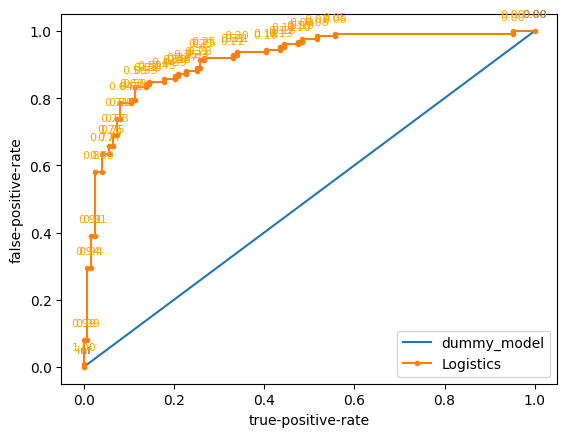

In [31]:
plt.plot(fpr,tpr,linestyle= '-',label = 'dummy_model')
plt.plot(fpr1,tpr1,marker = '.',label = 'Logistics')

for i, thr in enumerate(th):
    plt.annotate(f'{thr:.2f}', (fpr[i], tpr[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

for i, thr1 in enumerate(th1):
    plt.annotate(f'{thr1:.2f}', (fpr1[i], tpr1[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='orange')

plt.xlabel('true-positive-rate')
plt.ylabel('false-positive-rate')
plt.legend()
plt.show()